In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv("standardized.csv")
data = data.dropna(subset=["production_countries", "weighted_average_popularity"])
country_dict = {}

for index, row in data.iterrows():
    countries = row["production_countries"]
    popularity = row["weighted_average_popularity"]
    countries = ast.literal_eval(countries)
    
    for i in range(len(countries)):
        country = countries[i]
        if country not in country_dict:
            country_dict[country] = [popularity]
        else:
            country_dict[country].append(popularity)
        i += 1

data = pd.DataFrame(columns = ['country', 'popularity'])

for country, popularity in country_dict.items():
    for popularity in popularity:
        data = pd.concat([data, pd.DataFrame({'country': [country], 'popularity': [popularity]})], ignore_index=True)

print(data)
data.to_csv("country.csv", index = False)

     country  popularity
0         US        0.80
1         US        0.66
2         US        0.68
3         US        0.68
4         US        0.68
...      ...         ...
4399      AF        0.44
4400      AF        0.48
4401      AO        0.48
4402      NA        0.42
4403      FO        0.34

[4404 rows x 2 columns]


There is no relationship between the number of movie that country release and the popularity of the movie

In [109]:
from sklearn.feature_selection import mutual_info_classif

data = pd.read_csv("country.csv")
data = data.dropna(subset = ["country", "popularity"])

data["range"] = pd.cut(data["popularity"], bins=[0, 0.5, 1], labels=['<0.5', '>=0.5'])

countries = data[["country"]].copy()
popularity = data["range"]

countries["country"] = countries["country"].astype("category")

mi = mutual_info_classif(X=countries, y=popularity, discrete_features=True)
print(mi)                                   


[0.09232668]


The mutual information between country and popularity is 0.8, which shows there is a relationship between them

      num  popularity
0    1499        0.56
1     256        0.58
2      43        0.42
3     105        0.54
4     577        0.48
..    ...         ...
100     1        0.36
101     2        0.46
102     1        0.48
103     1        0.42
104     1        0.34

[105 rows x 2 columns]


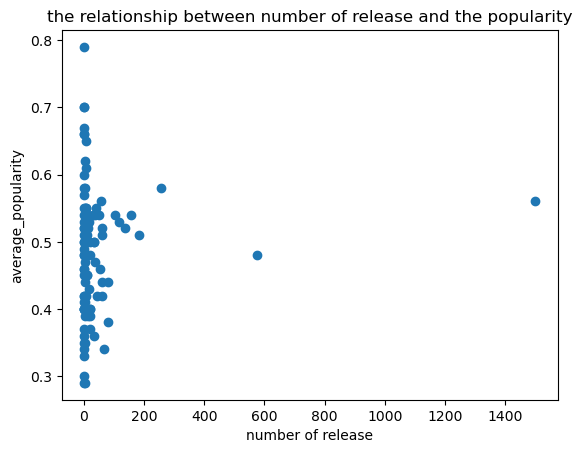

In [110]:
data2 = pd.DataFrame(columns = ['num', 'popularity'])
for country, popularity in country_dict.items():
    num = len(popularity)
    average = np.round(sum(popularity)/len(popularity),2)
    data2 = pd.concat([data2, pd.DataFrame({'num': [num], 'popularity': [average]})], ignore_index = True)
print(data2)
plt.scatter(x = data2['num'], y = data2['popularity'])
plt.xlabel("number of release")
plt.ylabel("average_popularity")
plt.title("the relationship between number of release and the popularity")
plt.show()
data2.to_csv("data.csv")